In [5]:
using BenchmarkTools

function karatsuba(x::Int, y::Int)::Int
    if x < (1 << 32) || y < (1 << 32)
        return naive_multiplication(x,y)
    end

    n = max(floor(Int, log2(x) + 1), floor(Int, log2(y) + 1))
    half = div(n, 2)

    high_x, low_x = x >> half, x & ((1 << half) - 1)
    high_y, low_y = y >> half, y & ((1 << half) - 1)

    z0 = karatsuba(low_x, low_y)
    z1 = karatsuba((low_x + high_x), (low_y + high_y))
    z2 = karatsuba(high_x, high_y)

    return (z2 << (2 * half)) + ((z1 - z2 - z0) << half) + z0
end

function naive_multiplication(x::Int, y::Int)::Int
    x_digits = digits(x, base=2)
    y_digits = digits(y, base=2)

    result = 0
    for i in 1:length(y_digits)
        for j in 1:length(x_digits)
            result += (x_digits[j] * y_digits[i]) << (i + j - 2)
        end
    end

    return result
end


# Генерация случайных больших чисел
function generate_large_number(bits::Int)::Int
    return rand(2^(bits-1):2^bits - 1)
end

generate_large_number (generic function with 1 method)

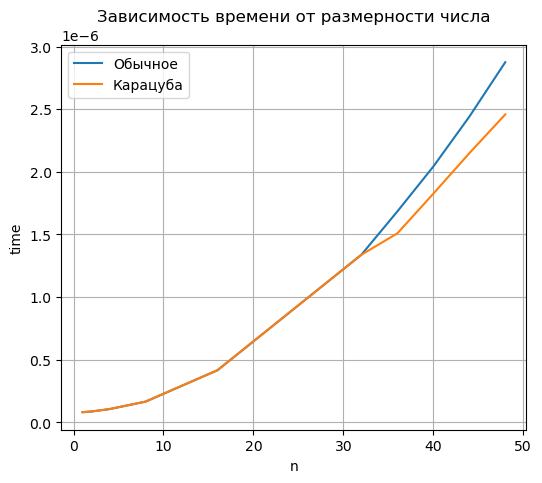

In [6]:
using PyPlot
regular_times = []
karatsuba_times = []
D = [1, 2, 4, 8, 16, 32, 36, 40, 44, 48]


for digits in D
    x = generate_large_number(digits)
    y = generate_large_number(digits)

    regular_time =  @belapsed naive_multiplication($x, $y)
    karatsuba_time = @belapsed karatsuba($x,$y)

    # println("Разрядность: $digits")
    # println("*Обычное умножение: $regular_time сек.*")
    # println("*Метод Карацубы: $karatsuba_time сек.*")


    push!(regular_times, regular_time)
    push!(karatsuba_times, karatsuba_time)

    # println(karatsuba(x,y) == x * y)
end

PyPlot.figure(figsize=(6, 5))
PyPlot.title("Зависимость времени от размерности числа")
PyPlot.xlabel("n")
PyPlot.ylabel("time")
PyPlot.plot(D , regular_times, label="Обычное")
PyPlot.plot(D, karatsuba_times, label="Карацуба")
PyPlot.grid()
PyPlot.legend()
PyPlot.show()